Enter the number of sales records:  2
Enter category for record 1:  vehicals
Enter product name for record 1:  benz
Enter revenue for benz:  40000
Enter units sold for benz:  4
Enter date (YYYY-MM-DD) for benz:  2024-11-16
Enter category for record 2:  4
Enter product name for record 2:  watches
Enter revenue for watches:  60000
Enter units sold for watches:  5
Enter date (YYYY-MM-DD) for watches:  2023-12-14


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2 non-null      datetime64[ns]
 1   Category      2 non-null      object        
 2   Product Name  2 non-null      object        
 3   Revenue       2 non-null      float64       
 4   Units Sold    2 non-null      int64         
 5   Year          2 non-null      int32         
 6   Month         2 non-null      int32         
 7   Day           2 non-null      int32         
 8   Weekday       2 non-null      object        
dtypes: datetime64[ns](1), float64(1), int32(3), int64(1), object(3)
memory usage: 252.0+ bytes
None
        Date  Category Product Name  Revenue  Units Sold  Year  Month  Day  \
0 2024-11-16  vehicals         benz  40000.0           4  2024     11   16   
1 2023-12-14         4      watches  60000.0           5  2023     12   14   

    Weekday  


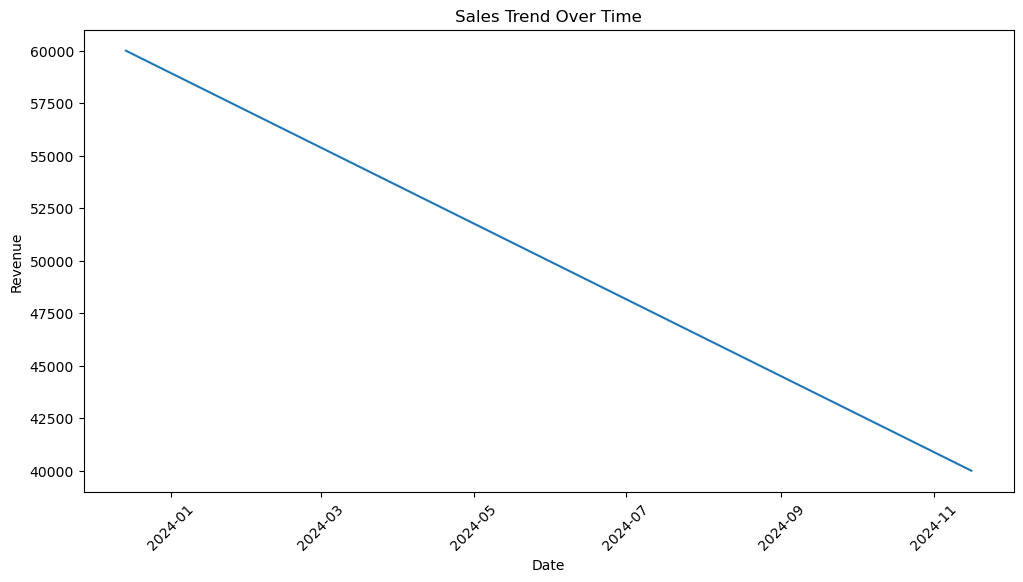

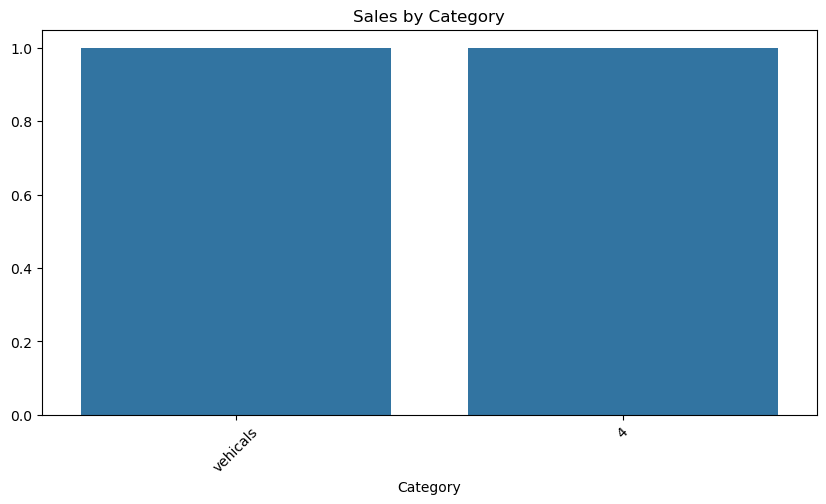

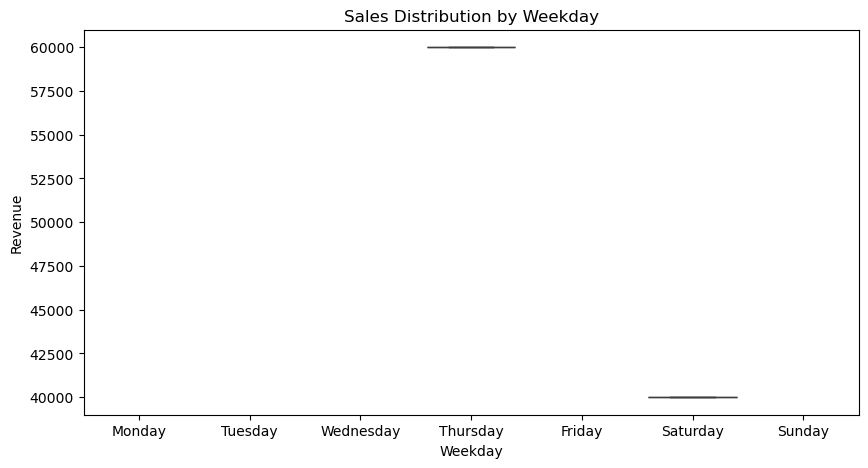

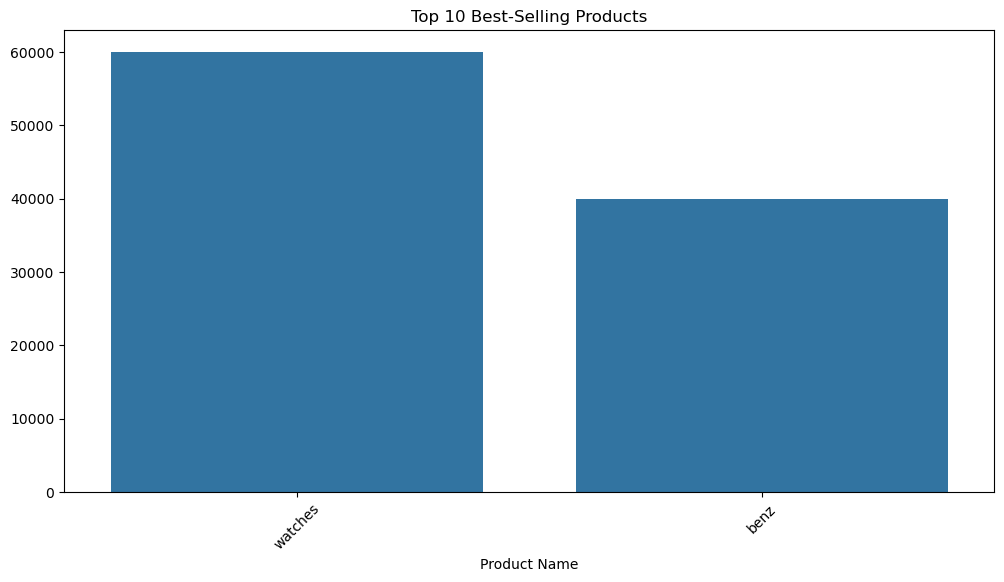

ValueError: could not convert string to float: 'vehicals'

<Figure size 1000x600 with 0 Axes>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get user input for sales data
data = []
n = int(input("Enter the number of sales records: "))

for i in range(n):
    category = input(f"Enter category for record {i+1}: ")
    product = input(f"Enter product name for record {i+1}: ")
    revenue = float(input(f"Enter revenue for {product}: "))
    units_sold = int(input(f"Enter units sold for {product}: "))
    date = input(f"Enter date (YYYY-MM-DD) for {product}: ")
    data.append([date, category, product, revenue, units_sold])

# Create DataFrame
df = pd.DataFrame(data, columns=['Date', 'Category', 'Product Name', 'Revenue', 'Units Sold'])

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract relevant time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.day_name()

# Display basic info about the dataset
print(df.info())
print(df.head())

# Sales trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Revenue', data=df)
plt.title('Sales Trend Over Time')
plt.xticks(rotation=45)
plt.show()

# Sales by category
plt.figure(figsize=(10, 5))
sns.barplot(x=df['Category'].value_counts().index, y=df['Category'].value_counts().values)
plt.title('Sales by Category')
plt.xticks(rotation=45)
plt.show()

# Sales distribution by weekday
plt.figure(figsize=(10, 5))
sns.boxplot(x='Weekday', y='Revenue', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Sales Distribution by Weekday')
plt.show()

# Top-selling products
top_products = df.groupby('Product Name')['Revenue'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top 10 Best-Selling Products')
plt.xticks(rotation=45)
plt.show()

# Correlation heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


print("Data Analysis Completed.")